In [2]:
# 과제에 필요한 데이터 csv 파일들을 코랩 폴더에 업로드합니다
# 셀을 실행하면 '파일 선택' 버튼이 활성화됩니다
# '파일 선택'을 누르고 제공한 3개의 데이터(salary, heart, income)를 업로드합니다
from google.colab import files
uploaded = files.upload()

Saving heart_data.csv to heart_data.csv
Saving income_data.csv to income_data.csv
Saving salary_data.csv to salary_data.csv


In [3]:
# 업로드한 파일을 불러옵니다
import io
import pandas as pd

# 과제 1번에 필요한 연차-연봉 데이터를 읽습니다
df1 = pd.read_csv(io.StringIO(uploaded['salary_data.csv'].decode('utf-8')))

# 과제 2번에 필요한 심장 질환 데이터를 읽습니다
df2 = pd.read_csv(io.StringIO(uploaded['heart_data.csv'].decode('utf-8')))

# 과제 3번에 필요한 성인 소득 데이터를 읽습니다
df3 = pd.read_csv(io.StringIO(uploaded['income_data.csv'].decode('utf-8')))

# **과제 1번**
**선형 회귀 알고리즘**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 연차-연봉 데이터 6000개 (salary_data.csv)
*   **목적**: 특정 연차의 회사원의 연봉을 예측합니다.
*   **과제 내용**


1.   주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.
2.   학습 데이터셋을 선형 회귀 알고리즘을 생성하여 학습합니다.
3.   평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 평균제곱오차)

## 0. 데이터셋 설명


*   **X 데이터**  
Years of Experience: 직장인의 연차 [년]
*   **Y 데이터**   
Salary: 직장인의 연봉 [$ 달러]


In [ ]:
# 과제 1번 데이터 (연차-연봉 데이터)
df1

,Years of Experience,Salary
0,3.0,52000.0
1,3.0,70000.0
2,4.0,55000.0
3,10.0,110000.0
4,8.0,140000.0
...,...,...
5995,4.0,70000.0
5996,14.0,140000.0
5997,10.0,128999.0
5998,7.0,185000.0


## 1. 데이터셋 나누기
주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.   
**Hint**: train_test_split() 함수 활용

In [4]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split

X = df1[['Years of Experience']]
y = df1['Salary']

# 학습 데이터셋과 평가 데이터셋 분리 (80% 학습, 20% 평가)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. 모델 생성 및 학습
학습 데이터셋을 선형 회귀 알고리즘을 생성하여 학습합니다.


In [5]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## 3. 모델 평가
평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 평균제곱오차)

In [6]:
# 모델 평가
from sklearn.metrics import mean_squared_error

# 평가 데이터셋을 사용하여 예측 수행
y_pred = model.predict(X_test)

# 평균제곱오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("평균제곱오차(MSE):", mse)

평균제곱오차(MSE): 1003968652.7709334


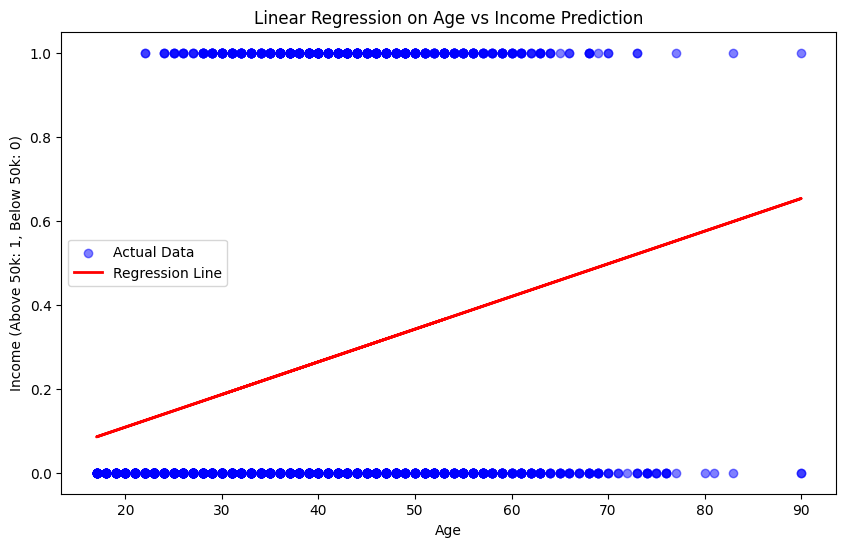

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 'age' 특성과 타겟 변수(target)만 사용해 새 모델 학습
X_age_train = X_train[['age']]
X_age_test = X_test[['age']]
y_income_train = y_train

age_model = LinearRegression()
age_model.fit(X_age_train, y_income_train)

y_pred_age = age_model.predict(X_age_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_age_test, y_test, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X_age_test, y_pred_age, color='red', linewidth=2, label="Regression Line")

plt.xlabel("Age")
plt.ylabel("Income (Above 50k: 1, Below 50k: 0)")
plt.title("Linear Regression on Age vs Income Prediction")
plt.legend()
plt.show()


# **과제 2번**
**로지스틱 회귀 알고리즘**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 심장 질환 데이터 1000개 (heart_data.csv)
*   **목적**: 환자에게 심장 질환이 있는지 여부를 예측합니다.
*   **과제 내용**


1.   주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.
2.   학습 데이터셋을 로지스틱 회귀 알고리즘을 생성하여 학습합니다.
3.   평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 정확도, 정밀도, 재현율, F1 점수)

## 0. 데이터셋 설명


*   **X 데이터**

1.   age: 환자의 나이 [세]
2.   trestbps: 안정 혈압 [mmHg]
3.   chol: 혈청 콜레스테롤 수치 [mm/dl]
4.   thalach: 최대 심박동수 [mmHg]
5.   oldpeak: ST 분절 하강 수치


*   **Y 데이터**   
target: 심장질환 여부 (있음: 1 / 없음: 0)

In [7]:
# 과제 2번 데이터 (심장 질환 데이터)
df2

,age,trestbps,chol,thalach,oldpeak,target
0,56,130,221,163,0.0,1
1,66,146,278,152,0.0,1
2,66,150,226,114,2.6,1
3,63,130,330,132,1.8,0
4,48,130,275,139,0.2,1
...,...,...,...,...,...,...
995,42,136,315,125,1.8,0
996,53,138,234,160,0.0,1
997,57,165,289,124,1.0,0
998,41,110,172,158,0.0,0


## 1. 데이터셋 나누기
주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.   
**Hint**: train_test_split() 함수 활용

In [9]:
# 데이터셋 나누기
X = df2[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df2['target']

# 데이터셋 분할 (80% 학습용, 20% 평가용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. 모델 생성 및 학습
학습 데이터셋을 선형 회귀 알고리즘을 생성하여 학습합니다.


In [10]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 3. 모델 평가
평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 정확도, 정밀도, 재현율, F1 점수)

In [11]:
# 모델 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 점수:", f1)

정확도: 0.705
정밀도: 0.6698113207547169
재현율: 0.7473684210526316
F1 점수: 0.7064676616915423


# **과제 3번**
**서포트 벡터 머신 알고리즘**을 사용하여 주어진 데이터셋을 학습해봅시다.


*   **데이터셋**: 성인 소득 데이터 10000개 (income_data.csv)
*   **목적**: 개인의 연간 소득이 50,000달러보다 높은지를 예측합니다.
*   **과제 내용**


1.   주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.
2.   학습 데이터셋을 서포트 벡터 머신 알고리즘을 생성하여 학습합니다.
3.   평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 정확도, 정밀도, 재현율, F1 점수)

## 데이터셋 설명


*   **X 데이터**

1.   age: 나이 [세]
2.   fnlwgt: 현인구조사 가중치
3.   capital-gain: 이익
4.   educational-num: 교육수준 번호
5.   hours-per-week: 주당 근무시간


*   **Y 데이터**   
target: 소득 (50,000달러 초과: 1 / 이하: 0)

In [ ]:
# 과제 3번 데이터 (성인 소득 데이터셋)
df3

,age,fnlwgt,capital-gain,educational-num,hours-per-week,target
0,26,211435,0,9,40,0
1,25,201635,0,13,50,0
2,65,178771,0,9,40,0
3,29,206351,5013,6,40,0
4,43,212490,0,11,40,0
...,...,...,...,...,...,...
9995,33,202191,0,10,35,0
9996,42,159911,0,9,24,0
9997,33,118941,0,13,40,1
9998,47,192755,0,9,20,1


## 1. 데이터셋 나누기
주어진 데이터셋을 학습 데이터셋과 평가 데이터셋으로 나눕니다.   
**Hint**: train_test_split() 함수 활용

In [13]:
# 데이터셋 나누기
X = df3[['age', 'fnlwgt', 'capital-gain', 'educational-num', 'hours-per-week']]
y = df3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. 모델 생성 및 학습
학습 데이터셋을 서포트 벡터 머신 알고리즘을 생성하여 학습합니다.


In [14]:
# 모델 생성 및 학습
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

## 3. 모델 평가
평가 데이터셋을 사용하여 학습한 모델의 성능을 평가합니다.(평가지표: 정확도, 정밀도, 재현율, F1 점수)

In [15]:
# 모델 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 점수:", f1)

정확도: 0.7745
정밀도: 0.9821428571428571
재현율: 0.10891089108910891
F1 점수: 0.19607843137254902
